<a href="https://colab.research.google.com/github/2018130864-KwonHaYeon/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

- 필요한 package들

# **Phasor**
- 다양한 종류의 sine wave를 만드는 것

In [3]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

- amplitude: wave의 진폭
- amplitude = 1 이면, sine wave의 높이가 -1~1의 range를 가진다.
- sr = sampling rate
- sr = 10000 이면, sine wave를 구성하는 점들이 1초에 10000개의 sample로 이루어져 있다.
- duration = 0.5초의 길이
- frequency = 1초에 반복되는 unit이 몇개 있는가? (1초에 굴곡이 4번 있다면, 4 Hz)
- frequency는 소리의 높낮이와 관련이 있다.
- sampling rate과 frequency는 1초당 몇 개가 있는지를 세기 때문에 Hz라는 단위를 쓸 수 있다.

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr

- 시간의 개념을 만들어야 한다. (sine 함수에 시간 개념이 존재하지 않기 때문에)
- 반드시 phase(각도값)와 time을 sync시켜줘야 한다.
- 시간 값을 만들고, 각도 값을 얹어준다.
- sampling rate = 시간을 얼마나 잘게 쪼갤 것인가? (1초를 10000개로 쪼갠다)
- np.arange(1, sr*dur+1)
- [1,2,3,4,5, .... 5000]/sr

--> [1/10000, 2/10000, 3/10000, ...5000/10000]

--> "초"의 개념이 된다.

--> np.arange(1, 10000*1+1)로 가정 --> np.arange(1,10001)

--> 1~10000까지의 숫자를 만들어 낸다.

--> 만약 duration이 0.5라면, 1~5000까지의 숫자를 만들어낸다.

In [5]:
# generate phase
theta = t * 2*np.pi * freq   

- 시간을 만들고, 각도의 개념으로 바꾼다. (radian 형태의 phase)
- 1초 * 2π: 제일 끝의 값이 2π가 되고, 나머지 값들은 그에 맞춰짐 (0부터 2π radian까지, 한 바퀴 짜리)
- 100개짜리를 만들어야 하므로 (원하는 frequency = 100이므로) 제일 끝에 있는 것에 100을 곱하여 맨 끝이 2π 가 아니라 200 π가 되어야 한다.

In [6]:
# generate signal by cosine-phasor
s = np.sin(theta)

- sine wave를 만들기 위한 함수
- sin(): 괄호 안에 각도가 radian의 형태로 변형되어 들어간다. (180도, 360도가 아니라 radian 으로 변환)

Text(0, 0.5, 'real')

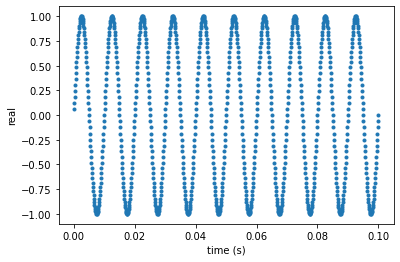

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

- plot(x,y)

x = [1,2,3]

y = [-1,0,1]

- x가 1일 때 y는 -1에 점을 찍고, 2일때 0, 3일때 1에 찍는다.

- x축은 phase, 각도 값이 아니라 시간
- t의 현재 sample 개수는 5000개

Text(0, 0.5, 'real')

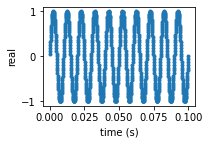

In [8]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

- subplot(235라면): 첫번째와 두번째는 2x3 의 행렬 (세로 2, 가로 3), 세번째는 그 행렬 가운데 5번째를 선택

In [9]:
ipd.Audio(s, rate=sr)